In [26]:
import pandas as pd

**What is the shape of "movies.csv"?**

In [27]:
df = pd.read_csv("movies.csv")

In [28]:
df.shape

(9742, 3)

In [29]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**What is the shape of "ratings.csv"?**

In [30]:
df1 = pd.read_csv("ratings.csv")

In [31]:
df1.shape

(100836, 4)

In [32]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**How many unique "userId" are available in "ratings.csv"?**

In [33]:
df1["userId"].nunique()

610

**Which movie has recieved maximum number of user ratings?**

In [34]:
temp_df = pd.merge(df,df1, how = "inner")

In [35]:
temp_df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [36]:
grp = temp_df.groupby("title")

In [37]:
grp["rating"].count().idxmax()

'Forrest Gump (1994)'

**What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**

In [38]:
res = temp_df.loc[temp_df["title"]==  "Terminator 2: Judgment Day (1991)","rating"]

In [39]:
res.mean()

3.970982142857143

**How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?**

<Axes: ylabel='Frequency'>

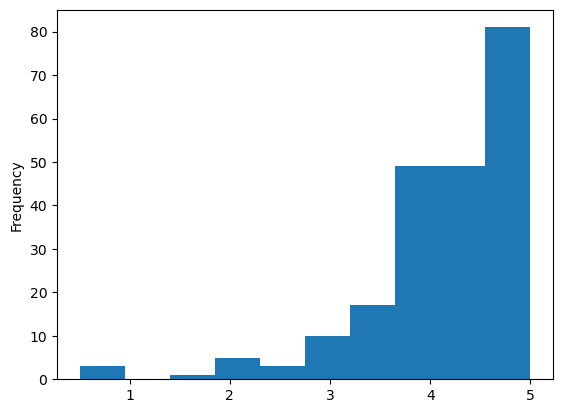

In [40]:
temp_df.loc[temp_df["title"] ==  "Fight Club (1999)", "rating"].plot(kind = "hist")

In [41]:
df2 = pd.read_csv("tags.csv")

In [42]:
df2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Select all the correct tags submitted by users to "Matrix, The (1999)" movie?**

In [43]:
temp_df1 = pd.merge(df, df2, how = "inner")

In [44]:
temp_df1.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [45]:
temp_df1.loc[(temp_df1["title"] == "Matrix, The (1999)"), "tag"]

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

**Which movie is the most popular based on  average user ratings?**

In [54]:

grouped_ratings = df1.groupby("movieId")["rating"].agg(['count', 'mean']).reset_index()


merged_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['count'] > 50]

most_popular_movie = filtered_df.loc[filtered_df['mean'].idxmax()]

print(most_popular_movie)


movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object


In [55]:
filtered_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


**Select all the correct options which comes under top 5 popular movies based on number of user ratings.**

In [56]:
top_movies = filtered_df.sort_values(by='count', ascending=False)

In [57]:
top_movies.head(5)

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


**Which Sci-Fi movie is "third most popular" based on the number of user ratings?**

In [70]:
res = top_movies[top_movies["genres"].str.contains("Sci-Fi")]

In [72]:
res.head(3)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [59]:
links_df = pd.read_csv("links.csv")

In [60]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [61]:
filtered_df = temp_df.groupby("title").filter(lambda x: x['rating'].count() > 50)

merged_df = pd.merge(filtered_df, links_df, on='movieId', how='inner')


In [62]:
merged_df

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,862.0
...,...,...,...,...,...,...,...,...
40707,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,1431045,293660.0
40708,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,1431045,293660.0
40709,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,1431045,293660.0
40710,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,1431045,293660.0


In [63]:
merged_df["title"].nunique()

437

In [68]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

ratings = []
for i in list(final_df['imdbId']):
    ratings.append(scrapper(i))